In [1]:
import json
import requests
from pandas import json_normalize
import pandas as pd


In [2]:
#json files: 10000 tweets each data set

df_who_raw = pd.read_json(path_or_buf='./data/tw_user_who', lines=True) # since 06.02.2020
df_who_raw.tail()


,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
19995,snscrape.modules.twitter.Tweet,https://twitter.com/WHO/status/122553245284586...,2020-02-06 21:31:20+00:00,"WHO will use the Shipping Fund Programme, esta...","WHO will use the Shipping Fund Programme, esta...",1225532452845867008,"{'_type': 'snscrape.modules.twitter.User', 'us...",13,50,99,...,1.225532e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,NaN,NaN,[2019nCoV],NaN,None,NaN,NaN
19996,snscrape.modules.twitter.Tweet,https://twitter.com/WHO/status/122553207397855...,2020-02-06 21:29:50+00:00,WHO and partners have activated a network of l...,WHO and partners have activated a network of l...,1225532073978552327,"{'_type': 'snscrape.modules.twitter.User', 'us...",9,72,97,...,1.225531e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,NaN,NaN,[2019nCoV],NaN,None,NaN,NaN
19997,snscrape.modules.twitter.Tweet,https://twitter.com/WHO/status/122553133163712...,2020-02-06 21:26:53+00:00,15 laboratories have been identified to provid...,15 laboratories have been identified to provid...,1225531331637129216,"{'_type': 'snscrape.modules.twitter.User', 'us...",137,480,898,...,NaN,None,None,NaN,NaN,[2019nCoV],NaN,None,NaN,NaN
19998,snscrape.modules.twitter.Tweet,https://twitter.com/WHO/status/122552455216546...,2020-02-06 20:59:57+00:00,@pahowho @WHO_Europe @WHOEMRO @WHOAFRO @WHOSEA...,@pahowho @WHO_Europe @WHOEMRO @WHOAFRO @WHOSEA...,1225524552165462016,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,67,150,...,1.225505e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"[depression, LetsTalk, TimeToTalk]",NaN,None,NaN,NaN
19999,snscrape.modules.twitter.Tweet,https://twitter.com/WHO/status/122550488699489...,2020-02-06 19:41:48+00:00,#Depression is not a sign of weakness.\n\n#Let...,#Depression is not a sign of weakness.\n\n#Let...,1225504886994894850,"{'_type': 'snscrape.modules.twitter.User', 'us...",7,183,389,...,1.225473e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,NaN,NaN,"[Depression, LetsTalk, TimeToTalk]",NaN,None,NaN,NaN


In [3]:
df_pfizer_raw= pd.read_json(path_or_buf='./data/tw_user_pfizer', lines=True) #since 29.9.2010
df_pfizer_raw.tail()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
9995,snscrape.modules.twitter.Tweet,https://twitter.com/pfizer/status/26635437619,2010-10-07 10:05:37+00:00,Pfizer #Oncology to present new clinical data ...,Pfizer #Oncology to present new clinical data ...,26635437619,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,6,3,...,NaN,None,None,None,None,[Oncology],None,None,NaN,NaN
9996,snscrape.modules.twitter.Tweet,https://twitter.com/pfizer/status/26565090456,2010-10-06 16:12:56+00:00,Pfizer to review strategic alternatives for Ca...,Pfizer to review strategic alternatives for Ca...,26565090456,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,0,...,NaN,None,None,None,None,None,None,None,NaN,NaN
9997,snscrape.modules.twitter.Tweet,https://twitter.com/pfizer/status/26394609085,2010-10-04 20:59:09+00:00,"If you are on Facebook, check out this campaig...","If you are on Facebook, check out this campaig...",26394609085,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,6,2,...,NaN,None,None,None,None,[chronicpain],None,None,NaN,NaN
9998,snscrape.modules.twitter.Tweet,https://twitter.com/pfizer/status/26384917380,2010-10-04 18:10:24+00:00,"Pfizer offers first 500,000 consumers free Adv...","Pfizer offers first 500,000 consumers free Adv...",26384917380,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,11,1,...,NaN,None,None,None,None,None,None,None,NaN,NaN
9999,snscrape.modules.twitter.Tweet,https://twitter.com/pfizer/status/25906284672,2010-09-29 18:21:18+00:00,How can we improve math and science education?...,How can we improve math and science education?...,25906284672,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,None,None,None,None,None,None,None,NaN,NaN


In [4]:
df_cdc_raw= pd.read_json(path_or_buf='./data/tw_user_CDCgov', lines=True) #since 21.4.2018
df_cdc_raw.tail()


,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
9995,snscrape.modules.twitter.Tweet,https://twitter.com/CDCgov/status/988447736881...,2018-04-23 16:01:19+00:00,Upcoming Facebook Live: NEW “We Were There” se...,Upcoming Facebook Live: NEW “We Were There” se...,988447736881188864,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,10,7,...,NaN,None,None,NaN,NaN,None,NaN,None,NaN,NaN
9996,snscrape.modules.twitter.Tweet,https://twitter.com/CDCgov/status/988432448882...,2018-04-23 15:00:34+00:00,It’s National Infant Immunization Week!\n\nHer...,It’s National Infant Immunization Week!\n\nHer...,988432448882184193,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,237,244,...,NaN,None,None,NaN,NaN,"[ivax2protect, NIIW]",NaN,None,NaN,NaN
9997,snscrape.modules.twitter.Tweet,https://twitter.com/CDCgov/status/988100212773...,2018-04-22 17:00:23+00:00,Do you or someone you know have a backyard flo...,Do you or someone you know have a backyard flo...,988100212773326848,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,63,77,...,NaN,None,None,NaN,NaN,None,NaN,None,NaN,NaN
9998,snscrape.modules.twitter.Tweet,https://twitter.com/CDCgov/status/988085379130...,2018-04-22 16:01:26+00:00,Do your children get enough #sleep? Use these ...,Do your children get enough #sleep? Use these ...,988085379130675201,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,76,75,...,NaN,None,None,NaN,NaN,"[sleep, kids]",NaN,None,NaN,NaN
9999,snscrape.modules.twitter.Tweet,https://twitter.com/CDCgov/status/987722728118...,2018-04-21 16:00:24+00:00,Outbreak Alert: Throw away ALL store-bought r...,Outbreak Alert: Throw away ALL store-bought r...,987722728118607872,"{'_type': 'snscrape.modules.twitter.User', 'us...",27,734,396,...,NaN,None,None,NaN,NaN,None,NaN,None,NaN,NaN


In [5]:
df_ecdc_EU_raw= pd.read_json(path_or_buf='./data/tw_user_ECDC_EU', lines=True) #since 20.10.2010
df_ecdc_EU_raw.tail()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
5746,snscrape.modules.twitter.Tweet,https://twitter.com/ECDC_EU/status/28388456193,2010-10-22 09:33:48+00:00,Register to #ESCAIDE or the European Scientifi...,Register to #ESCAIDE or the European Scientifi...,28388456193,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,None,None,None,"[ESCAIDE, ECDC]",NaN,None,NaN,NaN
5747,snscrape.modules.twitter.Tweet,https://twitter.com/ECDC_EU/status/28387080823,2010-10-22 09:05:58+00:00,Join our discussion on the future of #vaccinol...,Join our discussion on the future of #vaccinol...,28387080823,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,None,None,None,"[vaccinology, Eurovaccine]",NaN,None,NaN,NaN
5748,snscrape.modules.twitter.Tweet,https://twitter.com/ECDC_EU/status/27913975303,2010-10-20 09:00:25+00:00,Experts Rally To Get European Commitment To Ha...,Experts Rally To Get European Commitment To Ha...,27913975303,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,None,None,None,[ECDC],NaN,None,NaN,NaN
5749,snscrape.modules.twitter.Tweet,https://twitter.com/ECDC_EU/status/27909786369,2010-10-20 07:23:26+00:00,#ECDC is organising #ESCAIDE on 11-13 Nov in L...,#ECDC is organising #ESCAIDE on 11-13 Nov in L...,27909786369,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,None,None,None,"[ECDC, ESCAIDE, Twitter]",NaN,None,NaN,NaN
5750,snscrape.modules.twitter.Tweet,https://twitter.com/ECDC_EU/status/27909248996,2010-10-20 07:10:35+00:00,Read the latest measles surveillance for 2nd q...,Read the latest measles surveillance for 2nd q...,27909248996,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,None,None,None,None,NaN,None,NaN,NaN


In [6]:
df_Africa_cdc_raw= pd.read_json(path_or_buf='./data/tw_user_AfricaCDC', lines=True) #since 7.4.2016
df_Africa_cdc_raw.tail()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
4475,snscrape.modules.twitter.Tweet,https://twitter.com/AfricaCDC/status/721550450...,2016-04-17 04:06:47+00:00,On World Health Workers Day @_AfricanUnion Cel...,On World Health Workers Day @_AfricanUnion Cel...,721550450575740928,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,2,...,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[AUonEbola],NaN,None,NaN,NaN
4476,snscrape.modules.twitter.Tweet,https://twitter.com/AfricaCDC/status/721013247...,2016-04-15 16:32:08+00:00,With increased travel disease threats cn sprea...,With increased travel disease threats cn sprea...,721013247038603268,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,NaN,None,NaN,NaN
4477,snscrape.modules.twitter.Tweet,https://twitter.com/AfricaCDC/status/720896715...,2016-04-15 08:49:05+00:00,Disease is a threat we can do something about....,Disease is a threat we can do something about....,720896715943911424,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,NaN,None,NaN,NaN
4478,snscrape.modules.twitter.Tweet,https://twitter.com/AfricaCDC/status/720850183...,2016-04-15 05:44:11+00:00,#Ebola has proven it's time to reinforce our p...,#Ebola has proven it's time to reinforce our p...,720850183676821505,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[Ebola],NaN,None,NaN,NaN
4479,snscrape.modules.twitter.Tweet,https://twitter.com/AfricaCDC/status/718017930...,2016-04-07 10:09:49+00:00,Establishment of the Africa Center for Disease...,Establishment of the Africa Center for Disease...,718017930064183296,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,2,...,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,NaN,None,NaN,NaN


In [7]:
df_EMA_raw= pd.read_json(path_or_buf='./data/tw_user_EMA_News', lines=True) #since 7.4.2016
df_EMA_raw.tail()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
9002,snscrape.modules.twitter.Tweet,https://twitter.com/EMA_News/status/9631613421,2010-02-25 16:04:09+00:00,Monthly report from the February CHMP meeting....,Monthly report from the February CHMP meeting....,9631613421,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,None,NaN,NaN,None,NaN,None,NaN,NaN
9003,snscrape.modules.twitter.Tweet,https://twitter.com/EMA_News/status/9569622510,2010-02-24 09:51:04+00:00,European Medicines Agency launches public cons...,European Medicines Agency launches public cons...,9569622510,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,None,NaN,NaN,None,NaN,None,NaN,NaN
9004,snscrape.modules.twitter.Tweet,https://twitter.com/EMA_News/status/9553065847,2010-02-24 01:21:41+00:00,EMA and Swissmedic H1N1 pandemic medicines agr...,EMA and Swissmedic H1N1 pandemic medicines agr...,9553065847,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,None,NaN,NaN,None,NaN,None,NaN,NaN
9005,snscrape.modules.twitter.Tweet,https://twitter.com/EMA_News/status/9521267699,2010-02-23 11:07:08+00:00,European Medicines Agency update on pandemic i...,European Medicines Agency update on pandemic i...,9521267699,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,None,NaN,NaN,None,NaN,None,NaN,NaN
9006,snscrape.modules.twitter.Tweet,https://twitter.com/EMA_News/status/9521255438,2010-02-23 11:06:36+00:00,Meeting highlights from the CHMP 15-18 Februar...,Meeting highlights from the CHMP 15-18 Februar...,9521255438,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,None,NaN,NaN,None,NaN,None,NaN,NaN


In [8]:
df_Africa_cdc_raw.rawContent[4479]

'Establishment of the Africa Center for Disease Control @AfricaCDC was endorsed by African Heads of State and Government in January 2015'

In [9]:
#who tweets go back to 06.02.2020 so get the tweets from other sources since 6th of febr 2020
#df_Africa_cdc_date= df_Africa_cdc_raw.query("Dates >= "[:(df_Africa_cdc_raw.date== "2020-02-07")]
start_date= "2020-02-06"
df_Africa_cdc_date = df_Africa_cdc_raw[df_Africa_cdc_raw.date >= start_date]
#df.query('Dates >= @start_date and Dates <= @end_date')
df_Africa_cdc_date.tail()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
3350,snscrape.modules.twitter.Tweet,https://twitter.com/AfricaCDC/status/122538828...,2020-02-06 11:58:27+00:00,@WHO stated clearly that they should be no res...,@WHO stated clearly that they should be no res...,1225388283024244737,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,9,11,...,1.225388e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,NaN,None,NaN,NaN
3351,snscrape.modules.twitter.Tweet,https://twitter.com/AfricaCDC/status/122538827...,2020-02-06 11:58:27+00:00,{…} We need to have a coordinated approach in ...,{…} We need to have a coordinated approach in ...,1225388279899590657,"{'_type': 'snscrape.modules.twitter.User', 'us...",7,37,60,...,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Coronavirus, 2019nCoV, FactsNotFear]",NaN,None,NaN,NaN
3352,snscrape.modules.twitter.Tweet,https://twitter.com/AfricaCDC/status/122538358...,2020-02-06 11:39:47+00:00,AFRICAN PUBLIC HEALTH STRATEGY FOCUSES ON RAPI...,AFRICAN PUBLIC HEALTH STRATEGY FOCUSES ON RAPI...,1225383583621271553,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,31,62,...,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,"[Coronavirus, FactsNotFear]",NaN,None,NaN,NaN
3353,snscrape.modules.twitter.Tweet,https://twitter.com/AfricaCDC/status/122536807...,2020-02-06 10:38:10+00:00,@AfricaCDC Director @JNkengasong speaks to @Al...,@AfricaCDC Director @JNkengasong speaks to @Al...,1225368077375868928,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,13,17,...,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,[2019_nCov],NaN,None,NaN,NaN
3354,snscrape.modules.twitter.Tweet,https://twitter.com/AfricaCDC/status/122535952...,2020-02-06 10:04:11+00:00,https://t.co/i3KbaCoHrZ https://t.co/OjT4A0siMr,africacdc.org/press-centre/n… https://t.co/OjT...,1225359523298365441,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,7,10,...,NaN,None,None,None,None,None,NaN,None,NaN,NaN


In [10]:
df_Africa_cdc_raw.columns


Index(['_type', 'url', 'date', 'rawContent', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'links',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags', 'card', 'viewCount', 'vibe'],
      dtype='object')

In [11]:
df_cdc_raw.renderedContent

0       CDC's Public Health Associate Program (PHAP) h...
1       The entire family can build healthy habits tog...
2       .@CareersatCDC invites you to join the Intervi...
3       HCPs: Guide parents to credible information ab...
4       #DYK? Cavities are the most common chronic dis...
                              ...                        
9995    Upcoming Facebook Live: NEW “We Were There” se...
9996    It’s National Infant Immunization Week!\n\nHer...
9997    Do you or someone you know have a backyard flo...
9998    Do your children get enough #sleep? Use these ...
9999    Outbreak Alert:  Throw away ALL store-bought r...
Name: renderedContent, Length: 10000, dtype: object

In [12]:
df_Africa_cdc_raw.viewCount

0        3065.0
1        2044.0
2        2438.0
3       13213.0
4        3728.0
         ...   
4475        NaN
4476        NaN
4477        NaN
4478        NaN
4479        NaN
Name: viewCount, Length: 4480, dtype: float64

In [13]:
df_Africa_cdc_raw.card

0       None
1       None
2       None
3       None
4       None
        ... 
4475    None
4476    None
4477    None
4478    None
4479    None
Name: card, Length: 4480, dtype: object

In [14]:
df_Africa_cdc_raw.quotedTweet.iloc[4:50] #none values, can be dropped

4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
Name: quotedTweet, dtype: object

In [15]:
df_cdc_raw.inReplyToUser

0       None
1       None
2       None
3       None
4       None
        ... 
9995    None
9996    None
9997    None
9998    None
9999    None
Name: inReplyToUser, Length: 10000, dtype: object

In [16]:
df_Africa_cdc_raw.rawContent[0]

'@AfricaCDC acting Director held a bilateral meeting with the Secretary General of the #Norwegian #RedCross. They discussed existing engagements on pushing the agenda of Community Health Workers on the continent.\n#NewPublicHealthOrder #Partnerships @ifrc @IFRCAfrica https://t.co/hJmzqiT3WV'

In [17]:
df_Africa_cdc_raw.cashtags.isnull().sum()

4480

In [18]:
df_Africa_cdc_raw.retweetedTweet
df_who_raw.retweetedTweet.isnull().sum() #This whole column is null so it can be dropped

20000

In [19]:
df_Africa_cdc_raw.retweetedTweet.isnull().sum()

4480

In [20]:
df_Africa_cdc_raw.media.loc[0]

[{'_type': 'snscrape.modules.twitter.Photo',
  'previewUrl': 'https://pbs.twimg.com/media/Fpe4ec1WYAA9Er0?format=jpg&name=small',
  'fullUrl': 'https://pbs.twimg.com/media/Fpe4ec1WYAA9Er0?format=jpg&name=large',
  'altText': None},
 {'_type': 'snscrape.modules.twitter.Photo',
  'previewUrl': 'https://pbs.twimg.com/media/Fpe4eeyXEAIBCN2?format=jpg&name=small',
  'fullUrl': 'https://pbs.twimg.com/media/Fpe4eeyXEAIBCN2?format=jpg&name=large',
  'altText': None},
 {'_type': 'snscrape.modules.twitter.Photo',
  'previewUrl': 'https://pbs.twimg.com/media/Fpe4eexXoAAVmsG?format=jpg&name=small',
  'fullUrl': 'https://pbs.twimg.com/media/Fpe4eexXoAAVmsG?format=jpg&name=large',
  'altText': None}]

In [21]:
df_Africa_cdc_raw.links.loc[4475]

[{'_type': 'snscrape.modules.twitter.TextLink',
  'text': 'au.int/en/pressreleas…',
  'url': 'http://www.au.int/en/pressreleases/29541/world-health-workers-day-african-union-celebrates-aseowa-health-workers',
  'tcourl': 'https://t.co/L3LBkLKpW7',
  'indices': [76, 99]}]

In [22]:
df_Africa_cdc_raw.inReplyToUser.loc[1]

{'_type': 'snscrape.modules.twitter.User',
 'username': 'AfricaCDC',
 'id': 3149176301,
 'displayname': 'Africa CDC',
 'rawDescription': '@AfricaCDC is a technical institution of the @_AfricanUnion strengthening the capacity of Member States to respond quickly and effectively to disease threats.',
 'renderedDescription': '@AfricaCDC is a technical institution of the @_AfricanUnion strengthening the capacity of Member States to respond quickly and effectively to disease threats.',
 'descriptionLinks': None,
 'verified': True,
 'created': '2015-04-08T20:09:53+00:00',
 'followersCount': 144164,
 'friendsCount': 4933,
 'statusesCount': 6434,
 'favouritesCount': 5119,
 'listedCount': 683,
 'mediaCount': 2922,
 'location': 'Addis Ababa, Ethiopia',
 'protected': False,
 'link': {'_type': 'snscrape.modules.twitter.TextLink',
  'text': 'africacdc.org',
  'url': 'http://www.africacdc.org',
  'tcourl': 'https://t.co/sVkqpRBLWc',
  'indices': [0, 23]},
 'profileImageUrl': 'https://pbs.twimg.com/pr

## Dropping columns

In [23]:
test_afr_drop_df= df_Africa_cdc_raw.drop(["url","source", "sourceUrl","card","sourceLabel", "media", "cashtags", "quotedTweet"], axis=1)
test_afr_drop_df.columns

Index(['_type', 'date', 'rawContent', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'links', 'retweetedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'viewCount', 'vibe'],
      dtype='object')

## Create data setes that contain data since 02_2020

In [24]:
#create dictionary with all data to make for loops for cleaning

df_dict= {"Africa_CDC":df_Africa_cdc_raw, "ECDC_EU":df_ecdc_EU_raw, "Pfizer":df_pfizer_raw, "EMA": df_EMA_raw, "cdc": df_cdc_raw, "who":df_who_raw}
new_df_dict={}
start_date= "2020-02"
for user,df in df_dict.items():
    new_df_dict[f"{user}"]=df[df.date >= start_date]
    #new_df_dict[f"{user}_{start_date}_dropped"]=df.drop(["url","source", "sourceUrl","card","sourceLabel", "media", "cashtags", "quotedTweet"], axis=1)#These are the columns that don't have any useful info
    


In [25]:
new_df_dict.keys()

dict_keys(['Africa_CDC', 'ECDC_EU', 'Pfizer', 'EMA', 'cdc', 'who'])

In [26]:
drop_df_dict={}

for user,df in new_df_dict.items():
    drop_df_dict[f"{user}_dropped"]=df.drop(["url","source", "sourceUrl","card","sourceLabel", "media", "cashtags", "quotedTweet"], axis=1)

In [27]:
#divide dates in weeks




NameError: name 'datae' is not defined

### Extract dataframes from dictionary

In [28]:
df_ECDC_EU_clean= drop_df_dict["ECDC_EU_dropped"]
df_Africa_CDC_clean=drop_df_dict["Africa_CDC_dropped"]
df_pfizer_clean=drop_df_dict["Pfizer_dropped"]
df_EMA_clean=drop_df_dict["EMA_dropped"]
df_cdc_clean=drop_df_dict["cdc_dropped"]
df_who_clean=drop_df_dict["who_dropped"]

In [29]:
drop_df_dict.keys()

dict_keys(['Africa_CDC_dropped', 'ECDC_EU_dropped', 'Pfizer_dropped', 'EMA_dropped', 'cdc_dropped', 'who_dropped'])

In [30]:
filt1_ECDC_EU

NameError: name 'filt1_ECDC_EU' is not defined

In [31]:
#filter data for "Covid19" in the ECDC_EU tweets
import re

filt1_ECDC_EU=df_ECDC_EU_clean[df_ECDC_EU_clean["rawContent"].str.contains("SarsCov2|covid|covid19", flags=re.IGNORECASE)]

ECDC_EU_filt_grpd= filt1_ECDC_EU.groupby([(filt1_ECDC_EU.date.dt.year), (filt1_ECDC_EU.date.dt.month)])["id"].count()#.reset_index()
#filt1_ECDC_EU.groupby()
ECDC_EU_filt_grpd=ECDC_EU_filt_grpd.rename_axis(["year", "month"]).reset_index()
ECDC_EU_filt_grpd.rename(columns={"id": "covid_count"}, inplace=True)
#df.rename(columns={'id' : 'covid_count'}, inplace=True)
ECDC_EU_filt_grpd.head()




,year,month,covid_count
0,2020,2,28
1,2020,3,69
2,2020,4,59
3,2020,5,58
4,2020,6,41


In [32]:
def join_dates(x):
    return f"{str(x['year'])}-{str(x['month'])}"
    
ECDC_EU_filt_grpd['year'] = ECDC_EU_filt_grpd.apply(join_dates, axis=1)
ECDC_EU_filt_grpd.drop("month", axis=1, inplace=True)
ECDC_EU_filt_grpd.rename(columns={"year": "date"}, inplace=True)
ECDC_EU_filt_grpd.head()

,date,covid_count
0,2020-2,28
1,2020-3,69
2,2020-4,59
3,2020-5,58
4,2020-6,41


In [33]:
df_ECDC_EU_clean_grpd= df_ECDC_EU_clean.groupby([(df_ECDC_EU_clean.date.dt.year), (df_ECDC_EU_clean.date.dt.month)])["id"].count()#.reset_index()
#filt1_ECDC_EU.groupby()
df_ECDC_EU_clean_grpd=df_ECDC_EU_clean_grpd.rename_axis(["year", "month"]).reset_index()
df_ECDC_EU_clean_grpd.rename(columns={"id": "total_tweets"}, inplace=True)
df_ECDC_EU_clean_grpd.head()

,year,month,total_tweets
0,2020,2,101
1,2020,3,198
2,2020,4,82
3,2020,5,88
4,2020,6,65


In [34]:
df_ECDC_EU_clean_grpd['year'] = df_ECDC_EU_clean_grpd.apply(join_dates, axis=1)
df_ECDC_EU_clean_grpd.drop("month", axis=1, inplace=True)
df_ECDC_EU_clean_grpd.rename(columns={"year": "date"}, inplace=True)
df_ECDC_EU_clean_grpd.head()
ECDC_EU_filt_grpd.head()

,date,covid_count
0,2020-2,28
1,2020-3,69
2,2020-4,59
3,2020-5,58
4,2020-6,41


In [35]:
df_ECDC_EU_clean_grpd.head()

,date,total_tweets
0,2020-2,101
1,2020-3,198
2,2020-4,82
3,2020-5,88
4,2020-6,65


In [36]:
ECDC_EU = pd.merge(ECDC_EU_filt_grpd, df_ECDC_EU_clean_grpd, on='date')
ECDC_EU

,date,covid_count,total_tweets
0,2020-2,28,101
1,2020-3,69,198
2,2020-4,59,82
3,2020-5,58,88
4,2020-6,41,65
5,2020-7,42,57
6,2020-8,41,54
7,2020-9,48,64
8,2020-10,53,117
9,2020-11,54,70


In [37]:
def percentage(x):
    return x["covid_count"] / x['total_tweets']

ECDC_EU['covid_percentage'] = ECDC_EU.apply(percentage, axis=1)


In [38]:
ECDC_EU

,date,covid_count,total_tweets,covid_percentage
0,2020-2,28,101,0.277228
1,2020-3,69,198,0.348485
2,2020-4,59,82,0.719512
3,2020-5,58,88,0.659091
4,2020-6,41,65,0.630769
5,2020-7,42,57,0.736842
6,2020-8,41,54,0.759259
7,2020-9,48,64,0.750000
8,2020-10,53,117,0.452991
9,2020-11,54,70,0.771429


In [39]:
#filter ECDC_EU tweets for flu word


flu_ECDC_EU=df_ECDC_EU_clean[df_ECDC_EU_clean["rawContent"].str.contains("flu", flags=re.IGNORECASE)]

flu_ECDC_EU_group= flu_ECDC_EU.groupby([(flu_ECDC_EU.date.dt.year), (flu_ECDC_EU.date.dt.month)])["id"].count()#.reset_index()
#filt1_ECDC_EU.groupby()
flu_ECDC_EU_group=flu_ECDC_EU_group.rename_axis(["year", "month"]).reset_index()
flu_ECDC_EU_group.rename(columns={"id": "flu_count"}, inplace=True)
#df.rename(columns={'id' : 'covid_count'}, inplace=True)
flu_ECDC_EU_group.head()

,year,month,flu_count
0,2020,2,4
1,2020,5,1
2,2020,10,2
3,2020,11,1
4,2021,5,1


In [40]:
flu_ECDC_EU_group['year'] = flu_ECDC_EU_group.apply(join_dates, axis=1)
flu_ECDC_EU_group.drop("month", axis=1, inplace=True)
flu_ECDC_EU_group.rename(columns={"year": "date"}, inplace=True)
flu_ECDC_EU_group


,date,flu_count
0,2020-2,4
1,2020-5,1
2,2020-10,2
3,2020-11,1
4,2021-5,1
5,2021-7,2
6,2021-10,16
7,2021-11,1
8,2022-1,1
9,2022-2,1


In [41]:
ECDC_EU.head()

,date,covid_count,total_tweets,covid_percentage
0,2020-2,28,101,0.277228
1,2020-3,69,198,0.348485
2,2020-4,59,82,0.719512
3,2020-5,58,88,0.659091
4,2020-6,41,65,0.630769


In [42]:
#merge df to ECDC_EU:
ECDC_EU = pd.merge(ECDC_EU,flu_ECDC_EU_group, on='date', how='left').fillna(0)
ECDC_EU

,date,covid_count,total_tweets,covid_percentage,flu_count
0,2020-2,28,101,0.277228,4.0
1,2020-3,69,198,0.348485,0.0
2,2020-4,59,82,0.719512,0.0
3,2020-5,58,88,0.659091,1.0
4,2020-6,41,65,0.630769,0.0
5,2020-7,42,57,0.736842,0.0
6,2020-8,41,54,0.759259,0.0
7,2020-9,48,64,0.750000,0.0
8,2020-10,53,117,0.452991,2.0
9,2020-11,54,70,0.771429,1.0


In [43]:
ECDC_EU["flu_percentage"]=ECDC_EU["flu_count"]/ECDC_EU["total_tweets"]

In [44]:
ECDC_EU

,date,covid_count,total_tweets,covid_percentage,flu_count,flu_percentage
0,2020-2,28,101,0.277228,4.0,0.039604
1,2020-3,69,198,0.348485,0.0,0.000000
2,2020-4,59,82,0.719512,0.0,0.000000
3,2020-5,58,88,0.659091,1.0,0.011364
4,2020-6,41,65,0.630769,0.0,0.000000
5,2020-7,42,57,0.736842,0.0,0.000000
6,2020-8,41,54,0.759259,0.0,0.000000
7,2020-9,48,64,0.750000,0.0,0.000000
8,2020-10,53,117,0.452991,2.0,0.017094
9,2020-11,54,70,0.771429,1.0,0.014286


In [45]:
#filter ECDC_EU tweets for monkeypox/Mpox word


mpox_ECDC_EU=df_ECDC_EU_clean[df_ECDC_EU_clean["rawContent"].str.contains("Mpox|monkeypox", flags=re.IGNORECASE)]

mpox_ECDC_EU_group= mpox_ECDC_EU.groupby([(mpox_ECDC_EU.date.dt.year), (mpox_ECDC_EU.date.dt.month)])["id"].count()#.reset_index()
#filt1_ECDC_EU.groupby()
mpox_ECDC_EU_group=mpox_ECDC_EU_group.rename_axis(["year", "month"]).reset_index()
mpox_ECDC_EU_group.rename(columns={"id": "mpox_count"}, inplace=True)
#df.rename(columns={'id' : 'covid_count'}, inplace=True)
mpox_ECDC_EU_group.head()

,year,month,mpox_count
0,2022,5,6
1,2022,6,15
2,2022,7,10
3,2022,8,4
4,2022,9,1


In [46]:
#put year and month in one column
mpox_ECDC_EU_group['year'] = mpox_ECDC_EU_group.apply(join_dates, axis=1)
mpox_ECDC_EU_group.drop("month", axis=1, inplace=True)
mpox_ECDC_EU_group.rename(columns={"year": "date"}, inplace=True)
mpox_ECDC_EU_group

,date,mpox_count
0,2022-5,6
1,2022-6,15
2,2022-7,10
3,2022-8,4
4,2022-9,1
5,2022-10,1
6,2022-11,1
7,2022-12,1


In [47]:
#merge monkeypox into ECDC_EU dataframe

ECDC_EU = pd.merge(ECDC_EU,mpox_ECDC_EU_group, on='date', how='left').fillna(0)
ECDC_EU

,date,covid_count,total_tweets,covid_percentage,flu_count,flu_percentage,mpox_count
0,2020-2,28,101,0.277228,4.0,0.039604,0.0
1,2020-3,69,198,0.348485,0.0,0.000000,0.0
2,2020-4,59,82,0.719512,0.0,0.000000,0.0
3,2020-5,58,88,0.659091,1.0,0.011364,0.0
4,2020-6,41,65,0.630769,0.0,0.000000,0.0
5,2020-7,42,57,0.736842,0.0,0.000000,0.0
6,2020-8,41,54,0.759259,0.0,0.000000,0.0
7,2020-9,48,64,0.750000,0.0,0.000000,0.0
8,2020-10,53,117,0.452991,2.0,0.017094,0.0
9,2020-11,54,70,0.771429,1.0,0.014286,0.0


In [48]:
ECDC_EU["mpox_percentage"]=ECDC_EU["mpox_count"]/ECDC_EU["total_tweets"]
ECDC_EU.head()

,date,covid_count,total_tweets,covid_percentage,flu_count,flu_percentage,mpox_count,mpox_percentage
0,2020-2,28,101,0.277228,4.0,0.039604,0.0,0.0
1,2020-3,69,198,0.348485,0.0,0.000000,0.0,0.0
2,2020-4,59,82,0.719512,0.0,0.000000,0.0,0.0
3,2020-5,58,88,0.659091,1.0,0.011364,0.0,0.0
4,2020-6,41,65,0.630769,0.0,0.000000,0.0,0.0


In [49]:
def get_covid_tweet_counts(df):
    df_filt=df[df["rawContent"].str.contains("SarsCov2|covid|covid19", flags=re.IGNORECASE)]
    df_grpd= df_filt.groupby([(df_filt.date.dt.year), (df_filt.date.dt.month)])["id"].count()#.reset_index()
    df_grpd=df_grpd.rename_axis(["year", "month"]).reset_index()
    df_grpd.rename(columns={"id": "covid_count"}, inplace=True)
    return df_grpd


In [50]:
def get_total_tweet_count(df):
    df_total= df.groupby([(df.date.dt.year), (df.date.dt.month)])["id"].count()#.reset_index()
    df_total=df_total.rename_axis(["year", "month"]).reset_index()
    df_total.rename(columns={"id": "total_tweets"}, inplace=True)
    return df_total

In [51]:
df_ECDC_EU_clean_grpd.head()

,date,total_tweets
0,2020-2,101
1,2020-3,198
2,2020-4,82
3,2020-5,88
4,2020-6,65


In [52]:
def date_in_one_column(df_grpd):#or use df_total if this is done at the total tweets
    if not df_grpd.shape[0]==0:
        
        df_grpd['year'] = df_grpd.apply(join_dates, axis=1)
    df_grpd.drop("month", axis=1, inplace=True)
    df_grpd.rename(columns={"year": "date"}, inplace=True)
    return df_grpd

In [53]:
def merge_to_total(df_total,df_grpd):
    df_merged = pd.merge(df_total,df_grpd, on='date',how='left').fillna(0)
    return df_merged

In [54]:
def get_flu_tweet_counts(df):
    df_filt=df[df["rawContent"].str.contains("flu", flags=re.IGNORECASE)]
    df_grpd= df_filt.groupby([(df_filt.date.dt.year), (df_filt.date.dt.month)])["id"].count()#.reset_index()
    df_grpd=df_grpd.rename_axis(["year", "month"]).reset_index()
    df_grpd.rename(columns={"id": "flu_count"}, inplace=True)
    return df_grpd

In [55]:
def get_mpox_tweet_counts(df):
    df_filt=df[df["rawContent"].str.contains("Mpox|monkeypox", flags=re.IGNORECASE)]
    df_grpd= df_filt.groupby([(df_filt.date.dt.year), (df_filt.date.dt.month)])["id"].count()#.reset_index()
    df_grpd=df_grpd.rename_axis(["year", "month"]).reset_index()
    df_grpd.rename(columns={"id": "mpox_count"}, inplace=True)
    return df_grpd

In [56]:
df_pfizer_clean.shape[0]

1911

In [59]:
df_grpd_Africa_covid=date_in_one_column(get_covid_tweet_counts(df_Africa_CDC_clean))

In [60]:
df_grpd_Africa_total=date_in_one_column(get_total_tweet_count(df_Africa_CDC_clean))

In [61]:
df_merged_Africa=merge_to_total(df_grpd_Africa_total,df_grpd_Africa_covid)

In [62]:
df_merged_Africa.head()

,date,total_tweets,covid_count
0,2020-2,85,15
1,2020-3,114,78
2,2020-4,126,110
3,2020-5,149,121
4,2020-6,143,101


In [63]:
df_grpd_Africa_flu=date_in_one_column(get_flu_tweet_counts(df_Africa_CDC_clean))

In [64]:
df_grpd_Africa_flu

,date,flu_count
0,2020-4,1
1,2021-3,4
2,2021-12,1
3,2022-5,1
4,2022-7,1
5,2022-9,1
6,2022-10,1


In [65]:
df_merged_Africa=merge_to_total(df_merged_Africa,df_grpd_Africa_flu)

In [66]:
df_merged_Africa

,date,total_tweets,covid_count,flu_count
0,2020-2,85,15,0.0
1,2020-3,114,78,0.0
2,2020-4,126,110,1.0
3,2020-5,149,121,0.0
4,2020-6,143,101,0.0
5,2020-7,60,47,0.0
6,2020-8,100,80,0.0
7,2020-9,108,97,0.0
8,2020-10,96,59,0.0
9,2020-11,102,33,0.0


In [67]:
df_grpd_Africa_mpox=date_in_one_column(get_mpox_tweet_counts(df_Africa_CDC_clean))

In [68]:
df_grpd_Africa_mpox

,date,mpox_count
0,2022-6,1
1,2022-7,1
2,2022-9,2
3,2022-10,1
4,2022-12,1


In [69]:
df_merged_Africa=merge_to_total(df_merged_Africa,df_grpd_Africa_mpox)

In [70]:
df_merged_Africa

,date,total_tweets,covid_count,flu_count,mpox_count
0,2020-2,85,15,0.0,0.0
1,2020-3,114,78,0.0,0.0
2,2020-4,126,110,1.0,0.0
3,2020-5,149,121,0.0,0.0
4,2020-6,143,101,0.0,0.0
5,2020-7,60,47,0.0,0.0
6,2020-8,100,80,0.0,0.0
7,2020-9,108,97,0.0,0.0
8,2020-10,96,59,0.0,0.0
9,2020-11,102,33,0.0,0.0


In [71]:
def do_all_counts(df):
    
    df_grpd_covid=date_in_one_column(get_covid_tweet_counts(df))

    df_grpd_total=date_in_one_column(get_total_tweet_count(df))

    df_merged=merge_to_total(df_grpd_total,df_grpd_covid)



    df_grpd_flu=date_in_one_column(get_flu_tweet_counts(df))

    df_merged=merge_to_total(df_merged,df_grpd_flu)
                               

    df_grpd_mpox=date_in_one_column(get_mpox_tweet_counts(df))


    df_merged=merge_to_total(df_merged,df_grpd_mpox)
    
    return df_merged

In [72]:
df_ECDC_EU_clean
df_Africa_CDC_clean
df_pfizer_clean
df_EMA_clean
df_cdc_clean
df_who_clean

,_type,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,links,retweetedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,viewCount,vibe
0,snscrape.modules.twitter.Tweet,2023-02-22 14:59:34+00:00,"@DrTedros @MunSecConf ""No crisis happens in is...","@DrTedros @MunSecConf ""No crisis happens in is...",1628409168217481218,"{'_type': 'snscrape.modules.twitter.User', 'us...",15,11,50,1,...,None,NaN,1.628409e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,None,31292.0,NaN
1,snscrape.modules.twitter.Tweet,2023-02-22 14:59:19+00:00,"@DrTedros ""At the @MunSecConf last Friday, I s...","@DrTedros ""At the @MunSecConf last Friday, I s...",1628409106187923456,"{'_type': 'snscrape.modules.twitter.User', 'us...",15,9,39,0,...,None,NaN,1.628409e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,None,33061.0,NaN
2,snscrape.modules.twitter.Tweet,2023-02-22 14:58:59+00:00,"@DrTedros ""These discussions will be crucial f...","@DrTedros ""These discussions will be crucial f...",1628409019026087939,"{'_type': 'snscrape.modules.twitter.User', 'us...",6,4,16,0,...,None,NaN,1.628409e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,None,9808.0,NaN
3,snscrape.modules.twitter.Tweet,2023-02-22 14:58:42+00:00,"@DrTedros ""This week, WHO Member States are ho...","@DrTedros ""This week, WHO Member States are ho...",1628408950218432514,"{'_type': 'snscrape.modules.twitter.User', 'us...",5,4,16,0,...,None,NaN,1.628409e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,[PandemicAccord],8474.0,NaN
4,snscrape.modules.twitter.Tweet,2023-02-22 14:58:16+00:00,"@DrTedros ""Earthquakes, conflict and the ongoi...","@DrTedros ""Earthquakes, conflict and the ongoi...",1628408838314418176,"{'_type': 'snscrape.modules.twitter.User', 'us...",3,6,26,0,...,None,NaN,1.628408e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,[COVID19],9274.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,snscrape.modules.twitter.Tweet,2020-02-06 21:31:20+00:00,"WHO will use the Shipping Fund Programme, esta...","WHO will use the Shipping Fund Programme, esta...",1225532452845867008,"{'_type': 'snscrape.modules.twitter.User', 'us...",13,50,99,3,...,[{'_type': 'snscrape.modules.twitter.TextLink'...,NaN,1.225532e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,NaN,NaN,[2019nCoV],NaN,NaN
19996,snscrape.modules.twitter.Tweet,2020-02-06 21:29:50+00:00,WHO and partners have activated a network of l...,WHO and partners have activated a network of l...,1225532073978552327,"{'_type': 'snscrape.modules.twitter.User', 'us...",9,72,97,8,...,[{'_type': 'snscrape.modules.twitter.TextLink'...,NaN,1.225531e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,NaN,NaN,[2019nCoV],NaN,NaN
19997,snscrape.modules.twitter.Tweet,2020-02-06 21:26:53+00:00,15 laboratories have been identified to provid...,15 laboratories have been identified to provid...,1225531331637129216,"{'_type': 'snscrape.modules.twitter.User', 'us...",137,480,898,93,...,[{'_type': 'snscrape.modules.twitter.TextLink'...,NaN,NaN,None,None,NaN,NaN,[2019nCoV],NaN,NaN
19998,snscrape.modules.twitter.Tweet,2020-02-06 20:59:57+00:00,@pahowho @WHO_Europe @WHOEMRO @WHOAFRO @WHOSEA...,@pahowho @WHO_Europe @WHOEMRO @WHOAFRO @WHOSEA...,1225524552165462016,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,67,150,4,...,[{'_type': 'snscrape.modules.twitter.TextLink'...,NaN,1.225505e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"[depression, LetsTalk, TimeToTalk]",NaN,NaN


In [73]:
df_all_counts_pfizer=do_all_counts(df_pfizer_clean)

In [74]:
df_all_counts_EMA=do_all_counts(df_EMA_clean)

In [75]:
df_all_counts_cdc=do_all_counts(df_cdc_clean)

In [76]:
df_all_counts_who=do_all_counts(df_who_clean)

In [77]:
df_all_counts_ECDC_EU=do_all_counts(df_ECDC_EU_clean)

In [78]:
df_all_counts_Africa_CDC=do_all_counts(df_Africa_CDC_clean)

In [79]:
df_all_counts_pfizer
df_all_counts_EMA
df_all_counts_who
df_all_counts_Africa_CDC
df_all_counts_ECDC_EU
df_all_counts_cdc

,date,total_tweets,covid_count,flu_count,mpox_count
0,2020-2,176,39,17.0,0.0
1,2020-3,159,125,5.0,0.0
2,2020-4,173,150,6.0,0.0
3,2020-5,164,133,8.0,0.0
4,2020-6,160,116,1.0,0.0
5,2020-7,181,125,2.0,0.0
6,2020-8,189,110,12.0,0.0
7,2020-9,184,106,17.0,0.0
8,2020-10,218,121,28.0,0.0
9,2020-11,188,111,14.0,0.0


In [80]:
def add_percentages(df):
    df["covid_percentage"]=df["covid_count"]/df["total_tweets"]
    df["flu_percentage"]=df["flu_count"]/df["total_tweets"]
    df["mpox_percentage"]=df["mpox_count"]/df["total_tweets"]
    return df

In [81]:
organisations=[df_all_counts_pfizer,
df_all_counts_EMA,
df_all_counts_who,
df_all_counts_Africa_CDC,
df_all_counts_ECDC_EU,
df_all_counts_cdc]

In [82]:
#for df in organisations:
   # df.apply(add_percentages, axis=1)

In [83]:
add_percentages(df_all_counts_pfizer)

,date,total_tweets,covid_count,flu_count,mpox_count,covid_percentage,flu_percentage,mpox_percentage
0,2020-2,54,0.0,0.0,0.0,0.000000,0.000000,0.0
1,2020-3,63,29.0,0.0,0.0,0.460317,0.000000,0.0
2,2020-4,67,26.0,1.0,0.0,0.388060,0.014925,0.0
3,2020-5,96,31.0,0.0,0.0,0.322917,0.000000,0.0
4,2020-6,74,15.0,0.0,0.0,0.202703,0.000000,0.0
5,2020-7,68,25.0,1.0,0.0,0.367647,0.014706,0.0
6,2020-8,50,15.0,1.0,0.0,0.300000,0.020000,0.0
7,2020-9,129,28.0,0.0,0.0,0.217054,0.000000,0.0
8,2020-10,122,16.0,1.0,0.0,0.131148,0.008197,0.0
9,2020-11,81,25.0,0.0,0.0,0.308642,0.000000,0.0


In [84]:
add_percentages(df_all_counts_EMA)
add_percentages(df_all_counts_who)
add_percentages(df_all_counts_Africa_CDC)
add_percentages(df_all_counts_ECDC_EU)
add_percentages(df_all_counts_cdc)

,date,total_tweets,covid_count,flu_count,mpox_count,covid_percentage,flu_percentage,mpox_percentage
0,2020-2,176,39,17.0,0.0,0.221591,0.096591,0.000000
1,2020-3,159,125,5.0,0.0,0.786164,0.031447,0.000000
2,2020-4,173,150,6.0,0.0,0.867052,0.034682,0.000000
3,2020-5,164,133,8.0,0.0,0.810976,0.048780,0.000000
4,2020-6,160,116,1.0,0.0,0.725000,0.006250,0.000000
5,2020-7,181,125,2.0,0.0,0.690608,0.011050,0.000000
6,2020-8,189,110,12.0,0.0,0.582011,0.063492,0.000000
7,2020-9,184,106,17.0,0.0,0.576087,0.092391,0.000000
8,2020-10,218,121,28.0,0.0,0.555046,0.128440,0.000000
9,2020-11,188,111,14.0,0.0,0.590426,0.074468,0.000000


In [85]:
df_all_counts_who

,date,total_tweets,covid_count,flu_count,mpox_count,covid_percentage,flu_percentage,mpox_percentage
0,2020-2,653,319,7.0,0.0,0.488515,0.010720,0.000000
1,2020-3,771,602,30.0,0.0,0.780804,0.038911,0.000000
2,2020-4,917,699,9.0,0.0,0.762268,0.009815,0.000000
3,2020-5,936,549,7.0,0.0,0.586538,0.007479,0.000000
4,2020-6,685,445,14.0,0.0,0.649635,0.020438,0.000000
5,2020-7,604,404,7.0,0.0,0.668874,0.011589,0.000000
6,2020-8,614,404,5.0,0.0,0.657980,0.008143,0.000000
7,2020-9,673,385,2.0,0.0,0.572065,0.002972,0.000000
8,2020-10,767,441,15.0,0.0,0.574967,0.019557,0.000000
9,2020-11,782,348,6.0,0.0,0.445013,0.007673,0.000000


In [86]:
df_all_counts_EMA

,date,total_tweets,covid_count,flu_count,mpox_count,covid_percentage,flu_percentage,mpox_percentage
0,2020-2,15,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,2020-3,24,15.0,1.0,0.0,0.625000,0.041667,0.000000
2,2020-4,25,18.0,0.0,0.0,0.720000,0.000000,0.000000
3,2020-5,19,14.0,0.0,0.0,0.736842,0.000000,0.000000
4,2020-6,21,12.0,0.0,0.0,0.571429,0.000000,0.000000
5,2020-7,19,9.0,0.0,0.0,0.473684,0.000000,0.000000
6,2020-8,6,0.0,0.0,0.0,0.000000,0.000000,0.000000
7,2020-9,18,3.0,0.0,0.0,0.166667,0.000000,0.000000
8,2020-10,35,11.0,0.0,0.0,0.314286,0.000000,0.000000
9,2020-11,27,8.0,1.0,0.0,0.296296,0.037037,0.000000


In [87]:
df_all_counts_cdc


,date,total_tweets,covid_count,flu_count,mpox_count,covid_percentage,flu_percentage,mpox_percentage
0,2020-2,176,39,17.0,0.0,0.221591,0.096591,0.000000
1,2020-3,159,125,5.0,0.0,0.786164,0.031447,0.000000
2,2020-4,173,150,6.0,0.0,0.867052,0.034682,0.000000
3,2020-5,164,133,8.0,0.0,0.810976,0.048780,0.000000
4,2020-6,160,116,1.0,0.0,0.725000,0.006250,0.000000
5,2020-7,181,125,2.0,0.0,0.690608,0.011050,0.000000
6,2020-8,189,110,12.0,0.0,0.582011,0.063492,0.000000
7,2020-9,184,106,17.0,0.0,0.576087,0.092391,0.000000
8,2020-10,218,121,28.0,0.0,0.555046,0.128440,0.000000
9,2020-11,188,111,14.0,0.0,0.590426,0.074468,0.000000


## Plotting

In [89]:
import plotly.express as px
import plotly.graph_objects as go

In [91]:
organisations=[df_all_counts_pfizer,
df_all_counts_EMA,
df_all_counts_who,
df_all_counts_Africa_CDC,
df_all_counts_ECDC_EU,
df_all_counts_cdc]

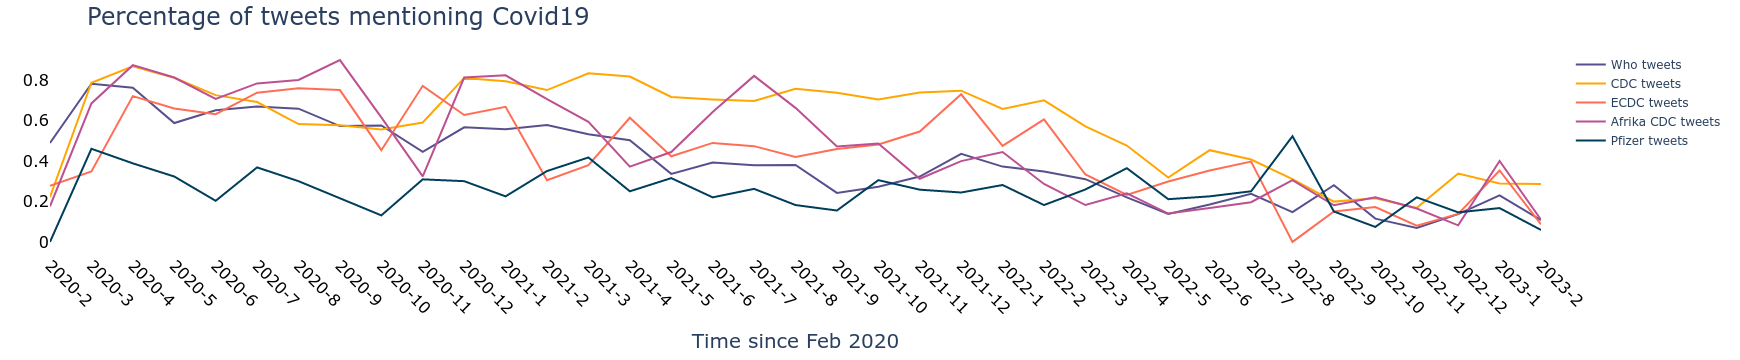

In [177]:
#Tweets about covid across organisations

colors=['#003f5c', '#58508d', '#bc5090', '#ff6e54', '#ffa600']
x_ticks= df_all_counts_pfizer.date

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_all_counts_who["date"], y=df_all_counts_who["covid_percentage"].round(3),
                    mode='lines', name= "Who tweets",  marker_color=colors[1], 
                    ))
fig.add_trace(go.Scatter(x=df_all_counts_cdc["date"], y=df_all_counts_cdc["covid_percentage"].round(3),
                    mode='lines', name= "CDC tweets",  marker_color=colors[4],))
#fig.add_trace(go.Scatter(x=df_all_counts_EMA["date"], y=df_all_counts_EMA["covid_percentage"],
                    #mode='lines', name= "EMA tweets",  marker_color=colors[2], line_shape='spline'
                    #))

fig.add_trace(go.Scatter(x=df_all_counts_ECDC_EU["date"], y=df_all_counts_ECDC_EU["covid_percentage"].round(3),
                    mode='lines', name= "ECDC tweets",  marker_color=colors[3],
                        ))
fig.add_trace(go.Scatter(x=df_all_counts_Africa_CDC["date"], y=df_all_counts_Africa_CDC["covid_percentage"].round(3),
                    mode='lines', name= "Afrika CDC tweets",  marker_color=colors[2], 
                        ))
             
fig.add_trace(go.Scatter(x=df_all_counts_pfizer["date"], y=df_all_counts_pfizer["covid_percentage"].round(3),
                    mode='lines', name= "Pfizer tweets",  marker_color=colors[0],
                    ))



fig.update_layout(
    title={"text": "Percentage of tweets mentioning Covid19", "font": {"size": 24}},
    
    margin=dict(l=50, r=20, t=50, b=20),
    paper_bgcolor="white",
    plot_bgcolor='white',
    xaxis={"tickvals": x_ticks, "ticktext": x_ticks, "tickangle": 45 ,"title": {"text":"Time since Feb 2020", "font": {"size": 20}}},
    hovermode="x unified",
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        
    )
)

fig.update_layout(xaxis_type='category', 
                    bargap=0.7,
                    xaxis = dict(
                        tickfont=dict( size=16, color='black'),
                    ))
fig.update_layout( 
                    bargap=0.7,
                    yaxis = dict(
                        tickfont=dict( size=16, color='black'),
                    ))
    
fig.show()

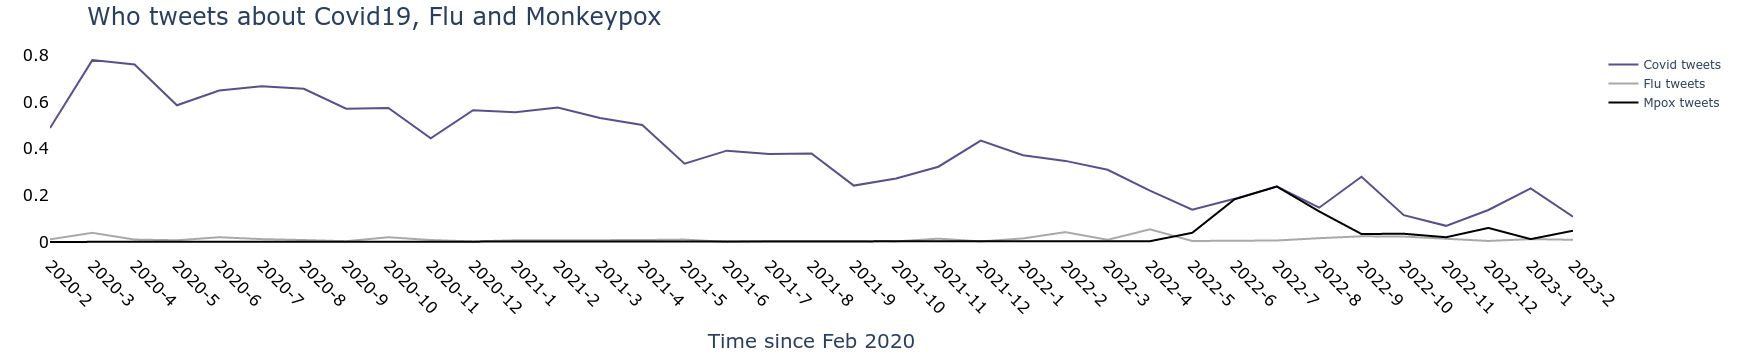

In [190]:
#Tweets about covid across organisations
import numpy as np
    
colors=['#003f5c', '#58508d', '#bc5090', '#ff6e54', '#ffa600']

x_ticks= df_all_counts_pfizer.date

fig2 = go.Figure()

fig2.add_trace(go.Scatter(x=df_all_counts_who["date"], y=df_all_counts_who["covid_percentage"].round(3),
                    mode='lines', name= "Covid tweets",  marker_color=colors[1], 
                    ))
#fig.add_trace(go.Scatter(x=df_all_counts_EMA["date"], y=df_all_counts_EMA["covid_percentage"],
                    #mode='lines', name= "EMA tweets",  marker_color=colors[2], line_shape='spline'
                    #))
fig2.add_trace(go.Scatter(x=df_all_counts_who["date"], y=df_all_counts_who["flu_percentage"].round(3),
                    mode='lines', name= "Flu tweets ",  marker_color="darkgrey", 
                        ))
fig2.add_trace(go.Scatter(x=df_all_counts_who["date"], y=df_all_counts_who["mpox_percentage"].round(3),
                    mode='lines', name= "Mpox tweets",  marker_color="black", ))
             



fig2.update_layout(
    title={"text": "Who tweets about Covid19, Flu and Monkeypox", "font": {"size": 24}},
    
    margin=dict(l=50, r=20, t=50, b=20),
    paper_bgcolor="white",
    plot_bgcolor='white',
    xaxis={"tickvals": x_ticks, "ticktext": x_ticks, "tickangle": 45 ,"title": {"text":"Time since Feb 2020", "font": {"size": 20}}},
    hovermode="x unified",
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        
    )
)

fig2.update_layout(xaxis_type='category', 
                    bargap=0.7,
                    xaxis = dict(
                        tickfont=dict( size=16, color='black'),
                    ))
fig2.update_layout( 
                    bargap=0.7,
                    yaxis = dict(
                        tickfont=dict( size=16, color='black'),
                    ))    
fig2.show()

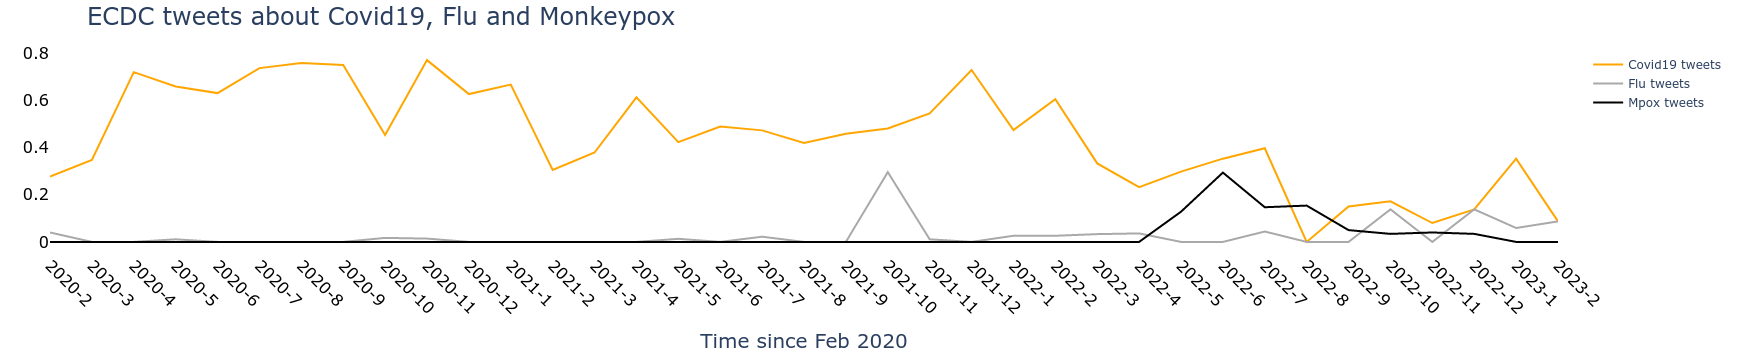

In [189]:

    
colors=['#003f5c', '#58508d', '#bc5090', '#ff6e54', '#ffa600']

x_ticks= df_all_counts_pfizer.date

fig3 = go.Figure()


#fig.add_trace(go.Scatter(x=df_all_counts_EMA["date"], y=df_all_counts_EMA["covid_percentage"],
                    #mode='lines', name= "EMA tweets",  marker_color=colors[2], line_shape='spline'
                    #))
fig3.add_trace(go.Scatter(x=df_all_counts_ECDC_EU["date"], y=df_all_counts_ECDC_EU["covid_percentage"].round(3),
                    mode='lines', name= "Covid19 tweets",  marker_color=colors[4], ))

fig3.add_trace(go.Scatter(x=df_all_counts_ECDC_EU["date"], y=df_all_counts_ECDC_EU["flu_percentage"].round(3),
                    mode='lines', name= "Flu tweets ",  marker_color="darkgrey", 
                        ))
fig3.add_trace(go.Scatter(x=df_all_counts_ECDC_EU["date"], y=df_all_counts_ECDC_EU["mpox_percentage"].round(3),
                    mode='lines', name= "Mpox tweets",  marker_color="black", ))
             



fig3.update_layout(
    title={"text": "ECDC tweets about Covid19, Flu and Monkeypox", "font": {"size": 24}},
    
    margin=dict(l=50, r=20, t=50, b=20),
    paper_bgcolor="white",
    plot_bgcolor='white',
    xaxis={"tickvals": x_ticks, "ticktext": x_ticks, "tickangle": 45 ,"title": {"text":"Time since Feb 2020", "font": {"size": 20}}},
    hovermode="x unified",
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        
    )
)

fig3.update_layout(xaxis_type='category', 
                    bargap=0.7,
                    xaxis = dict(
                        tickfont=dict( size=16, color='black'),
                    ))
fig3.update_layout( 
                    bargap=0.7,
                    yaxis = dict(
                        tickfont=dict( size=16, color='black'),
                    ))    
fig3.show()

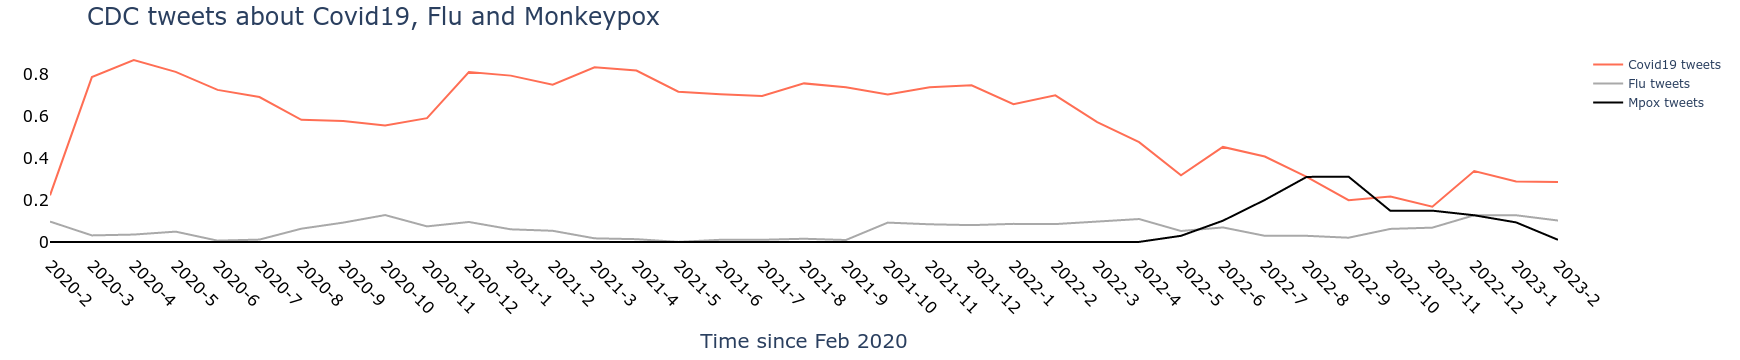

In [188]:
colors=['#003f5c', '#58508d', '#bc5090', '#ff6e54', '#ffa600']

x_ticks= df_all_counts_pfizer.date

fig4 = go.Figure()


#fig.add_trace(go.Scatter(x=df_all_counts_EMA["date"], y=df_all_counts_EMA["covid_percentage"],
                    #mode='lines', name= "EMA tweets",  marker_color=colors[2], line_shape='spline'
                    #))
fig4.add_trace(go.Scatter(x=df_all_counts_cdc["date"], y=df_all_counts_cdc["covid_percentage"].round(3),
                    mode='lines', name= "Covid19 tweets",  marker_color=colors[3], ))

fig4.add_trace(go.Scatter(x=df_all_counts_cdc["date"], y=df_all_counts_cdc["flu_percentage"].round(3),
                    mode='lines', name= "Flu tweets ",  marker_color="darkgrey", 
                        ))
fig4.add_trace(go.Scatter(x=df_all_counts_cdc["date"], y=df_all_counts_cdc["mpox_percentage"].round(3),
                    mode='lines', name= "Mpox tweets",  marker_color="black", ))
             



fig4.update_layout(
    title={"text": "CDC tweets about Covid19, Flu and Monkeypox", "font": {"size": 24}},
    
    margin=dict(l=50, r=20, t=50, b=20),
    paper_bgcolor="white",
    plot_bgcolor='white',
    xaxis={"tickvals": x_ticks, "ticktext": x_ticks, "tickangle": 45 ,"title": {"text":"Time since Feb 2020", "font": {"size": 20}}},
    hovermode="x unified",
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        
    )
)

fig4.update_layout(xaxis_type='category', 
                    bargap=0.7,
                    xaxis = dict(
                        tickfont=dict( size=16, color='black'),
                    ))
fig4.update_layout( 
                    bargap=0.7,
                    yaxis = dict(
                        tickfont=dict( size=16, color='black'),
                    ))    
fig4.show()

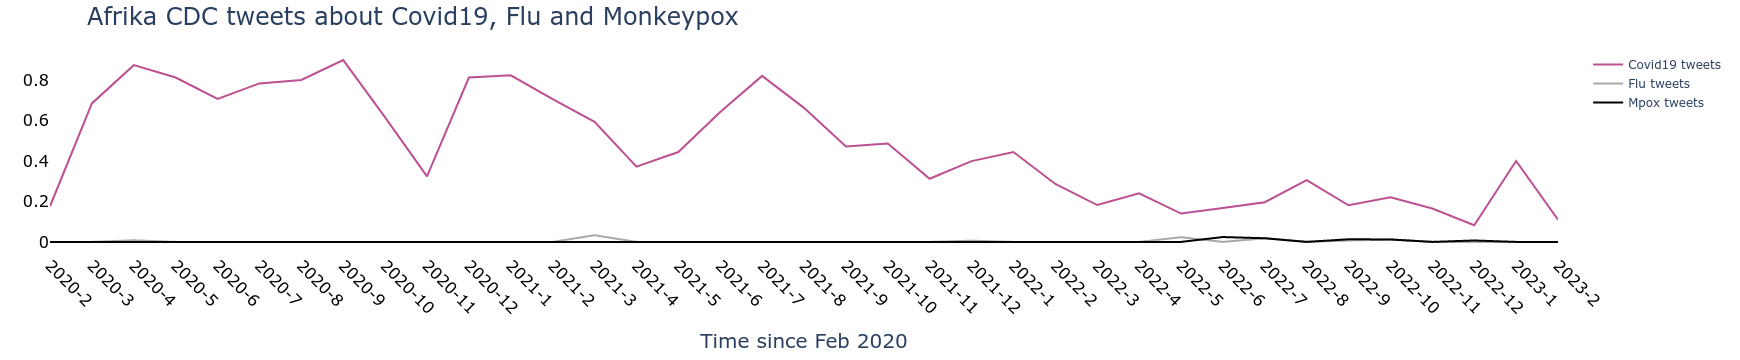

In [187]:
colors=['#003f5c', '#58508d', '#bc5090', '#ff6e54', '#ffa600']

x_ticks= df_all_counts_pfizer.date

fig5 = go.Figure()


#fig.add_trace(go.Scatter(x=df_all_counts_EMA["date"], y=df_all_counts_EMA["covid_percentage"],
                    #mode='lines', name= "EMA tweets",  marker_color=colors[2], line_shape='spline'
                    #))
fig5.add_trace(go.Scatter(x=df_all_counts_Africa_CDC["date"], y=df_all_counts_Africa_CDC["covid_percentage"].round(3),
                    mode='lines', name= "Covid19 tweets",  marker_color=colors[2], ))

fig5.add_trace(go.Scatter(x=df_all_counts_Africa_CDC["date"], y=df_all_counts_Africa_CDC["flu_percentage"].round(3),
                    mode='lines', name= "Flu tweets ",  marker_color="darkgrey", 
                        ))
fig5.add_trace(go.Scatter(x=df_all_counts_Africa_CDC["date"], y=df_all_counts_Africa_CDC["mpox_percentage"].round(3),
                    mode='lines', name= "Mpox tweets",  marker_color="black", ))
             



fig5.update_layout(
    title={"text": "Afrika CDC tweets about Covid19, Flu and Monkeypox", "font": {"size": 24}},
    
    margin=dict(l=50, r=20, t=50, b=20),
    paper_bgcolor="white",
    plot_bgcolor='white',
    xaxis={"tickvals": x_ticks, "ticktext": x_ticks, "tickangle": 45 ,"title": {"text":"Time since Feb 2020", "font": {"size": 20}}},
    hovermode="x unified",
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        
    )
)

fig5.update_layout(xaxis_type='category', 
                    bargap=0.7,
                    xaxis = dict(
                        tickfont=dict( size=16, color='black'),
                    ))
fig5.update_layout( 
                    bargap=0.7,
                    yaxis = dict(
                        tickfont=dict( size=16, color='black'),
                    ))    
fig5.show()

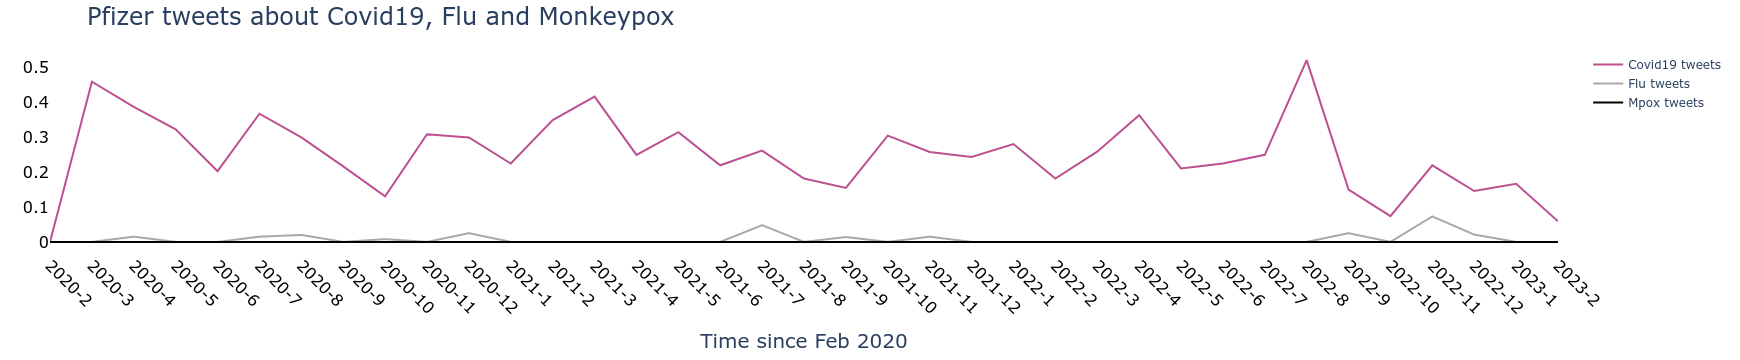

In [186]:
fig6 = go.Figure()


#fig.add_trace(go.Scatter(x=df_all_counts_EMA["date"], y=df_all_counts_EMA["covid_percentage"],
                    #mode='lines', name= "EMA tweets",  marker_color=colors[2], line_shape='spline'
                    #))
fig6.add_trace(go.Scatter(x=df_all_counts_pfizer["date"], y=df_all_counts_pfizer["covid_percentage"].round(3),
                    mode='lines', name= "Covid19 tweets",  marker_color=colors[2], ))

fig6.add_trace(go.Scatter(x=df_all_counts_pfizer["date"], y=df_all_counts_pfizer["flu_percentage"].round(3),
                    mode='lines', name= "Flu tweets ",  marker_color="darkgrey", 
                        ))
fig6.add_trace(go.Scatter(x=df_all_counts_pfizer["date"], y=df_all_counts_pfizer["mpox_percentage"].round(3),
                    mode='lines', name= "Mpox tweets",  marker_color="black", ))
             



fig6.update_layout(
    title={"text": "Pfizer tweets about Covid19, Flu and Monkeypox", "font": {"size": 24}},
    
    margin=dict(l=50, r=20, t=50, b=20),
    paper_bgcolor="white",
    plot_bgcolor='white',
    xaxis={"tickvals": x_ticks, "ticktext": x_ticks, "tickangle": 45 ,"title": {"text":"Time since Feb 2020", "font": {"size": 20}}},
    hovermode="x unified",
    hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        
    )
)

fig6.update_layout(xaxis_type='category', 
                    bargap=0.7,
                    xaxis = dict(
                        tickfont=dict( size=16, color='black'),
                    ))
fig6.update_layout( 
                    bargap=0.7,
                    yaxis = dict(
                        tickfont=dict( size=16, color='black'),
                    ))    
fig6.show()